# TRABALHO 7: Estrutura pelo Movimento (SFM)

### Discente: Kawan Oliveira


---



Dadas várias (n >= 5) imagens, compute a estrutura 3D e movimento relativo de câmera da cena visualizada utilizando as funções de Structure from Motion (SFM) da OpenCV. Assumindo uma câmera calibrada previamente:

1. Extrair pontos e descritores SIFT em duas imagens

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Função para exibir a imagem com os keypoints
def show_keypoints(image, keypoints):
    # Desenhando os pontos chave na imagem
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
    plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Função para processar o dataset de imagens
def process_images(image_paths):
    sift = cv2.SIFT_create()
    keypoints_list = []
    descriptors_list = []

    for image_path in image_paths:
        # Carregar a imagem
        image = cv2.imread(image_path)
        if image is None:
            print(f"Erro ao carregar a imagem {image_path}")
            continue

        # Converter a imagem para escala de cinza
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detectar pontos-chave e descritores
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        # Armazenar os keypoints e descritores
        keypoints_list.append(keypoints)
        descriptors_list.append(descriptors)

        # Opcional: Mostrar a imagem com os keypoints
        # show_keypoints(image, keypoints)

        print(f"Imagem {image_path}: {len(keypoints)} pontos-chave detectados.")

    return keypoints_list, descriptors_list

# Função para emparelhar os descritores entre duas imagens
def match_descriptors(descriptors1, descriptors2):
    # Usar o FLANN baseado em KNN para fazer o emparelhamento
    index_params = dict(algorithm=1, trees=10)  # Usando FLANN com árvores
    search_params = dict(checks=50)  # Parâmetros para busca

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Filtrar as boas correspondências utilizando o critério de Lowe (distância mínima)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return good_matches

# Função para exibir as correspondências entre duas imagens
def show_matches(image1, image2, keypoints1, keypoints2, matches):
    # Desenhando as correspondências entre as imagens
    image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None)
    plt.imshow(cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Caminho para o diretório das imagens
image_directory = r'D:\Kawan\Downloads\provscode\vrob\trab7\imagens'  # Substitua com o caminho correto para o diretório

# Lista de caminhos das imagens (supondo que as imagens sejam nomeadas sequencialmente)
image_paths = [os.path.join(image_directory, f'{i}.png') for i in range(30)]  # Ajuste a extensão se necessário

# Processar as imagens
keypoints_list, descriptors_list = process_images(image_paths)

# Exemplo: Emparelhar as primeiras duas imagens
matches = match_descriptors(descriptors_list[0], descriptors_list[1])

# Exibir as correspondências entre as duas imagens
show_matches(cv2.imread(image_paths[0]), cv2.imread(image_paths[1]), keypoints_list[0], keypoints_list[1], matches)


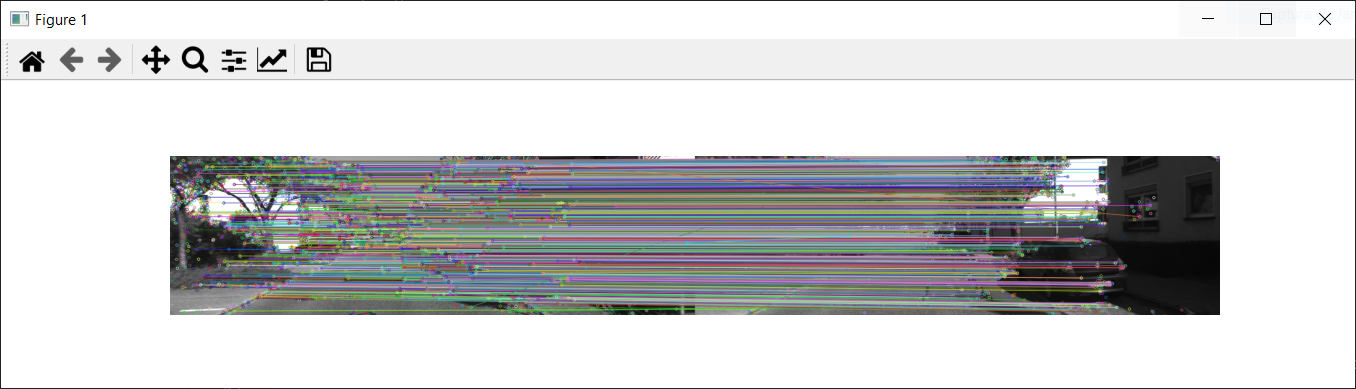


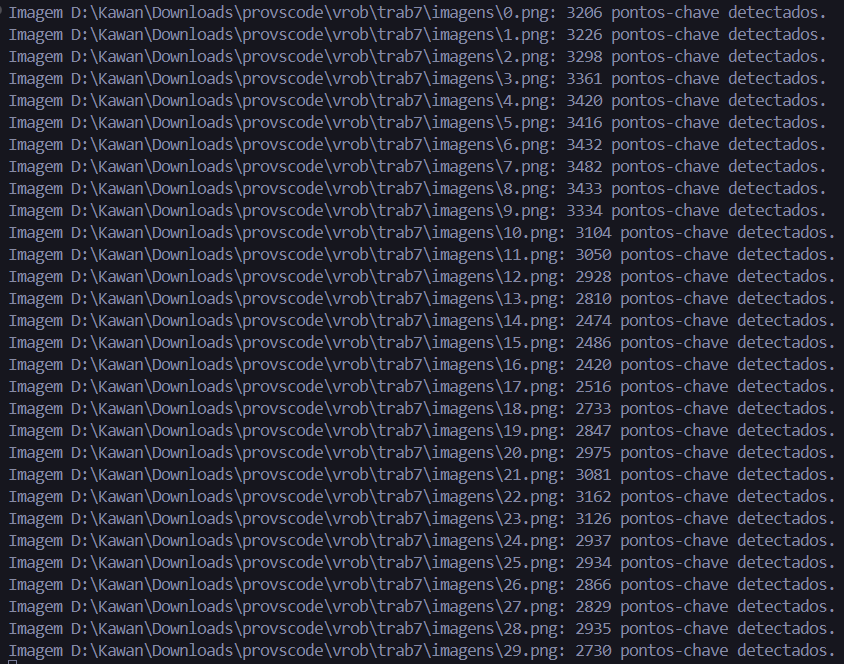

---

Particularmente, eu achei a quantidade de pontos-chaves detectados muito grande, esperava que achasse poucos. Porém, aparentemente essa quantidade é normal pelo que fui atrás de ver.
Foram utilizadas as funções da biblioteca da openCV para desenvolver o algoritmo de forma "rápida" e eficiente em processamento, visto o nível de otimização da biblioteca.
Enquanto fazia o trabalho, percebi também que estava enfrentando problemas em fazer o algoritmo achar as imagens, então tive que solucionar colocando o caminho completo até a pasta do projeto com as imagens para que o algoritmo encontrasse as imagens do datasert KITTY.

2. Realizar o casamento (matching) entre os descritores de ambas as
imagens

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Função para emparelhar os descritores entre duas imagens
def match_descriptors(descriptors1, descriptors2):
    # Usar o FLANN baseado em KNN para fazer o emparelhamento
    index_params = dict(algorithm=1, trees=10)  # Usando FLANN com árvores
    search_params = dict(checks=50)  # Parâmetros para busca

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Filtrar as boas correspondências utilizando o critério de Lowe (distância mínima)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return good_matches

# Função para exibir as correspondências entre duas imagens
def show_matches(image1, image2, keypoints1, keypoints2, matches):
    # Desenhando as correspondências entre as imagens
    image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Exibir as correspondências em uma nova janela chamada "Correspondências"
    cv2.imshow("Correspondências", image_matches)
    cv2.waitKey(0)  # Espera até que qualquer tecla seja pressionada
    cv2.destroyAllWindows()  # Fecha a janela após a tecla ser pressionada

# Função para processar o dataset de imagens
def process_images(image_paths):
    sift = cv2.SIFT_create()
    keypoints_list = []
    descriptors_list = []

    for image_path in image_paths:
        # Carregar a imagem
        image = cv2.imread(image_path)
        if image is None:
            print(f"Erro ao carregar a imagem {image_path}")
            continue

        # Converter a imagem para escala de cinza
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detectar pontos-chave e descritores
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        # Armazenar os keypoints e descritores
        keypoints_list.append(keypoints)
        descriptors_list.append(descriptors)

        print(f"Imagem {image_path}: {len(keypoints)} pontos-chave detectados.")

    return keypoints_list, descriptors_list

# Caminho para o diretório das imagens
image_directory = r'D:\Kawan\Downloads\provscode\vrob\trab7\imagens'  # Substitua com o caminho correto para o diretório

# Lista de caminhos das imagens (supondo que as imagens sejam nomeadas sequencialmente)
image_paths = [os.path.join(image_directory, f'{i}.png') for i in range(30)]  # Ajuste a extensão se necessário

# Processar as imagens
keypoints_list, descriptors_list = process_images(image_paths)

# Exemplo: Emparelhar as primeiras duas imagens
matches = match_descriptors(descriptors_list[0], descriptors_list[1])

# Verifique o número de correspondências
print(f"Número de correspondências: {len(matches)}")

# Exibir as correspondências entre as duas imagens
show_matches(cv2.imread(image_paths[0]), cv2.imread(image_paths[1]), keypoints_list[0], keypoints_list[1], matches)


Da mesma forma, foi feito o casamento usando as funcões da openCV.

Este código realiza o emparelhamento de pontos-chave entre duas imagens usando o algoritmo SIFT (Scale-Invariant Feature Transform) do OpenCV, que já foi feito no código anterior e foi aproveitado. Primeiro, ele carrega um conjunto de imagens, detecta pontos-chave e calcula descritores para cada imagem. Em seguida, emparelha os descritores entre duas imagens e filtra as boas correspondências com base em um critério de distância. Por fim, exibe as correspondências entre as imagens em uma janela gráfica.

## Número de correspondências: 1284

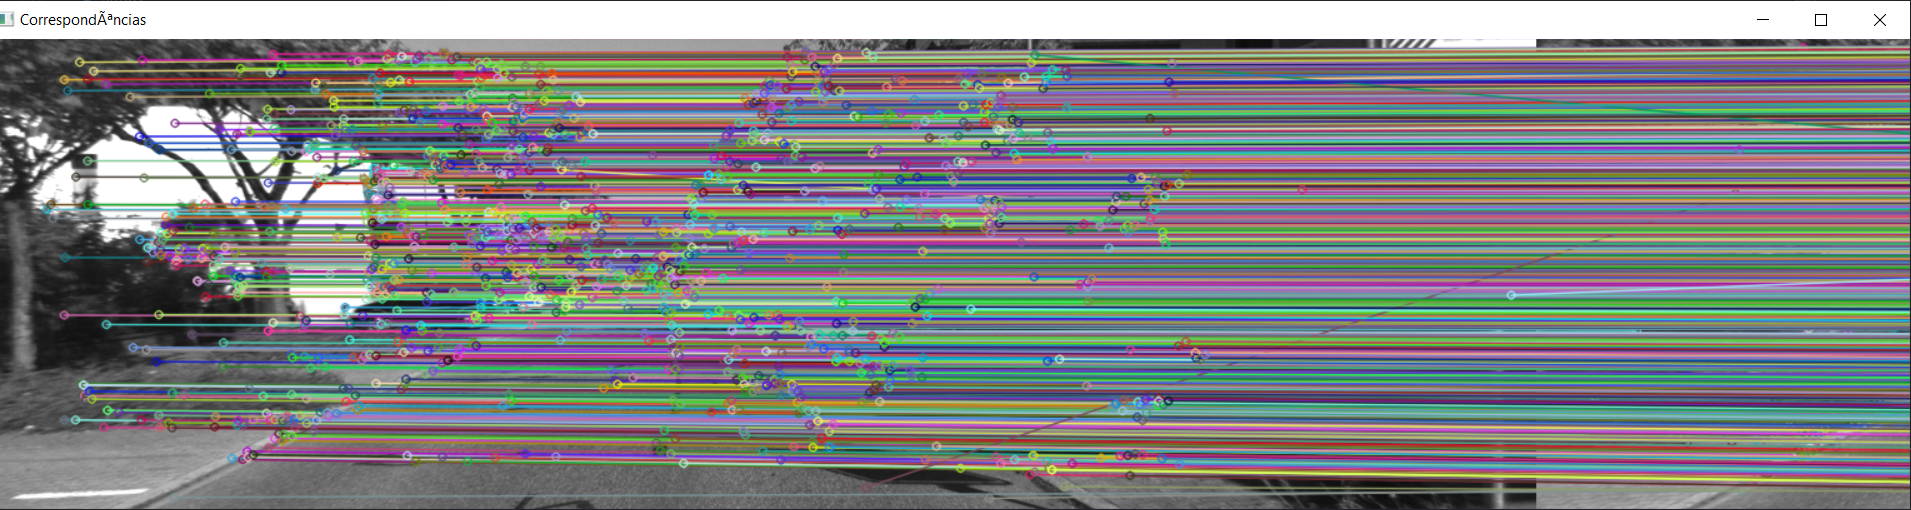

---

3. Estime a Matriz Essencial e a partir disto, a estrutura 3D inicial.

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Função para emparelhar os descritores entre duas imagens
def match_descriptors(descriptors1, descriptors2):
    # Usar o FLANN baseado em KNN para fazer o emparelhamento
    index_params = dict(algorithm=1, trees=10)  # Usando FLANN com árvores
    search_params = dict(checks=50)  # Parâmetros para busca

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Filtrar as boas correspondências utilizando o critério de Lowe (distância mínima)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return good_matches

# Função para exibir as correspondências entre duas imagens
def show_matches(image1, image2, keypoints1, keypoints2, matches):
    # Desenhando as correspondências entre as imagens
    image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Exibir as correspondências em uma nova janela chamada "Correspondências"
    cv2.imshow("Correspondências", image_matches)
    cv2.waitKey(0)  # Espera até que qualquer tecla seja pressionada
    cv2.destroyAllWindows()  # Fecha a janela após a tecla ser pressionada

# Função para processar o dataset de imagens
def process_images(image_paths):
    sift = cv2.SIFT_create()
    keypoints_list = []
    descriptors_list = []

    for image_path in image_paths:
        # Carregar a imagem
        image = cv2.imread(image_path)
        if image is None:
            print(f"Erro ao carregar a imagem {image_path}")
            continue

        # Converter a imagem para escala de cinza
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detectar pontos-chave e descritores
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        # Armazenar os keypoints e descritores
        keypoints_list.append(keypoints)
        descriptors_list.append(descriptors)

        print(f"Imagem {image_path}: {len(keypoints)} pontos-chave detectados.")

    return keypoints_list, descriptors_list

# Estimando a Matriz Essencial e a rotação/translação entre as duas imagens
def estimate_essential_matrix(keypoints1, keypoints2, matches, camera_matrix):
    # Extraindo as correspondências de pontos
    points1 = np.array([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.array([keypoints2[m.trainIdx].pt for m in matches])

    # Calcular a Matriz Essencial
    essential_matrix, mask = cv2.findEssentialMat(points1, points2, cameraMatrix=camera_matrix, method=cv2.RANSAC, prob=0.999, threshold=1.0)

    # Recuperar a rotação (R) e translação (T) a partir da Matriz Essencial
    _, R, T, _ = cv2.recoverPose(essential_matrix, points1, points2, cameraMatrix=camera_matrix, mask=mask)

    return essential_matrix, R, T

# Função para calcular a estrutura 3D inicial usando triangulação
def triangulate_points(camera_matrix, R, T, points1, points2):
    # A primeira câmera tem a matriz de projeção P1 = [I | 0]
    P1 = np.hstack((np.eye(3), np.zeros((3, 1))))

    # A segunda câmera tem a matriz de projeção P2 = [R | T]
    P2 = np.hstack((R, T))

    # Triangulação dos pontos
    points4D_hom = cv2.triangulatePoints(np.dot(camera_matrix, P1), np.dot(camera_matrix, P2), points1.T, points2.T)

    # Normalizar as coordenadas homogêneas
    points3D = points4D_hom / points4D_hom[3, :]

    return points3D[:3].T  # Retorna as coordenadas 3D (X, Y, Z)

# Caminho para o diretório das imagens
image_directory = r'D:\Kawan\Downloads\provscode\vrob\trab7\imagens'  # Substitua com o caminho correto para o diretório

# Lista de caminhos das imagens (supondo que as imagens sejam nomeadas sequencialmente)
image_paths = [os.path.join(image_directory, f'{i}.png') for i in range(30)]  # Ajuste a extensão se necessário

# Processar as imagens
keypoints_list, descriptors_list = process_images(image_paths)

# Exemplo: Emparelhar as primeiras duas imagens
matches = match_descriptors(descriptors_list[0], descriptors_list[1])

# Verifique o número de correspondências
print(f"Número de correspondências: {len(matches)}")

# Exibir as correspondências entre as duas imagens
show_matches(cv2.imread(image_paths[0]), cv2.imread(image_paths[1]), keypoints_list[0], keypoints_list[1], matches)

# Matriz intrínseca da câmera (calibrada previamente)
# Exemplo de matriz intrínseca, substitua com a sua
camera_matrix = np.array([[1000, 0, 640], [0, 1000, 360], [0, 0, 1]])

# Estimando a Matriz Essencial e a rotação e translação (R, T) entre as duas primeiras imagens
essential_matrix, R, T = estimate_essential_matrix(keypoints_list[0], keypoints_list[1], matches, camera_matrix)

# Pontos 2D correspondentes nas duas imagens
points1 = np.array([keypoints_list[0][m.queryIdx].pt for m in matches])
points2 = np.array([keypoints_list[1][m.trainIdx].pt for m in matches])

# Calculando a estrutura 3D inicial
points3D = triangulate_points(camera_matrix, R, T, points1, points2)

# Exibir a estrutura 3D (apenas para conferirmos os pontos)
print("Estrutura 3D calculada com sucesso!")
print(points3D)

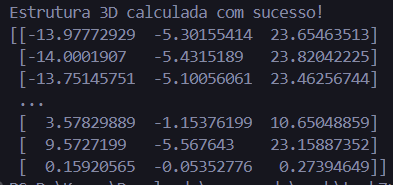

Utilizando as funções da openCV, este código realiza reconstrução 3D a partir de duas imagens usando correspondências de pontos-chave. Primeiro, ele detecta pontos-chave e descritores nas imagens, emparelha-os e utiliza a matriz essencial para estimar a rotação e translação entre as imagens. Com esses parâmetros, o código calcula a estrutura 3D dos pontos correspondentes através de triangulação. A reconstrução 3D resultante é exibida como um conjunto de coordenadas espaciais.

---
4. Para cada outra imagem, utilize PnP para localizar a câmera em relação à estrutura 3D já computada e em seguida, estender esta estrutura.

In [ ]:
import numpy as np
import cv2
import os

# Função para emparelhar os descritores entre duas imagens
def match_descriptors(descriptors1, descriptors2):
    index_params = dict(algorithm=1, trees=10)  # Usando FLANN com árvores
    search_params = dict(checks=50)  # Parâmetros para busca

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return good_matches

# Função para estimar a Matriz Essencial e a rotação/translação entre as duas imagens
def estimate_essential_matrix(keypoints1, keypoints2, matches, camera_matrix):
    points1 = np.array([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.array([keypoints2[m.trainIdx].pt for m in matches])

    essential_matrix, mask = cv2.findEssentialMat(points1, points2, cameraMatrix=camera_matrix, method=cv2.RANSAC, prob=0.999, threshold=1.0)
    _, R, T, _ = cv2.recoverPose(essential_matrix, points1, points2, cameraMatrix=camera_matrix, mask=mask)

    return essential_matrix, R, T, points1, points2

# Função para triangulação manual
def triangulate_points_manual(camera_matrix, R, T, points1, points2):
    P1 = np.hstack((np.eye(3), np.zeros((3, 1))))  # Primeira câmera
    P2 = np.hstack((R, T))  # Segunda câmera com R e T

    # Convertendo para homogêneo
    points1_hom = cv2.convertPointsToHomogeneous(points1).reshape(-1, 3).T
    points2_hom = cv2.convertPointsToHomogeneous(points2).reshape(-1, 3).T

    # Calcular a matriz de projeção para cada câmera
    P1 = np.dot(camera_matrix, P1)
    P2 = np.dot(camera_matrix, P2)

    # Listar os pontos 3D
    points3D = []
    for i in range(len(points1)):
        # Resolver o sistema para cada par de correspondências
        A = np.array([
            points1_hom[0][i]*P1[2] - P1[0],
            points1_hom[1][i]*P1[2] - P1[1],
            points2_hom[0][i]*P2[2] - P2[0],
            points2_hom[1][i]*P2[2] - P2[1]
        ])

        # Usar a decomposição de valores singulares (SVD) para resolver
        _, _, Vt = np.linalg.svd(A)
        X = Vt[-1]
        points3D.append(X[:3] / X[3])  # Normalizar para coordenadas homogêneas

    return np.array(points3D)

# Função para estimar a pose da câmera manualmente
def estimate_camera_pose_manually(camera_matrix, points3D, points2D):
    # Verifique se temos pelo menos 4 pontos
    if len(points2D) < 4:
        print("Erro: Número insuficiente de pontos para estimar a pose da câmera. São necessários pelo menos 4 pontos.")
        return None, None

    # A matriz de pontos 3D e 2D deve ter o mesmo número de pontos
    if len(points3D) != len(points2D):
        print("Erro: O número de pontos 3D e 2D não é consistente.")
        return None, None

    # Estimativa de pose com base na triangulação anterior (usando o PnP manual)
    A = []
    B = []

    for i in range(len(points2D)):
        A.append([points3D[i][0], points3D[i][1], points3D[i][2], 1])
        B.append([points2D[i][0], points2D[i][1]])

    A = np.array(A)
    B = np.array(B)

    # Resolver para a matriz de rotação e translação manualmente
    _, rvec, tvec = cv2.solvePnP(points3D, points2D, camera_matrix, distCoeffs=None)

    return rvec, tvec

# Caminho para o diretório das imagens
image_directory = r'D:\Kawan\Downloads\provscode\vrob\trab7\imagens'
image_paths = [os.path.join(image_directory, f'{i}.png') for i in range(30)]

# Instanciar o SIFT no início
sift = cv2.SIFT_create()

# Função para processar as imagens
def process_images(image_paths, sift):
    keypoints_list = []
    descriptors_list = []

    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Erro ao carregar a imagem {image_path}")
            continue

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        keypoints_list.append(keypoints)
        descriptors_list.append(descriptors)

        print(f"Imagem {image_path}: {len(keypoints)} pontos-chave detectados.")

    return keypoints_list, descriptors_list

# Processar as imagens
keypoints_list, descriptors_list = process_images(image_paths, sift)

# Definir a matriz da câmera (ajuste conforme necessário)
camera_matrix = np.array([[1000, 0, 640], [0, 1000, 360], [0, 0, 1]])

# Estimando a Matriz Essencial e a rotação e translação (R, T) entre as duas primeiras imagens
matches = match_descriptors(descriptors_list[0], descriptors_list[1])
essential_matrix, R, T, points1, points2 = estimate_essential_matrix(keypoints_list[0], keypoints_list[1], matches, camera_matrix)

# Calculando a estrutura 3D inicial
points3D = triangulate_points_manual(camera_matrix, R, T, points1, points2)

# Exibir a estrutura 3D inicial
print("Estrutura 3D inicial calculada com sucesso!")
print(f"Número de pontos 3D: {len(points3D)}")

# Agora, para as próximas imagens, vamos usar o PnP para estimar a pose da câmera e estender a estrutura 3D
for i in range(2, len(image_paths)):  # A partir da terceira imagem
    image = cv2.imread(image_paths[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detectar os pontos-chave na nova imagem
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Emparelhar os descritores com os descritores da imagem anterior
    matches = match_descriptors(descriptors_list[i-1], descriptors)

    # Obter os pontos correspondentes 2D
    image_points_2D = np.array([keypoints[m.trainIdx].pt for m in matches])

    # Estimar a pose da câmera em relação à estrutura 3D anterior
    if len(image_points_2D) >= 4:  # Garantir que temos pontos suficientes
        print(f"Estimar pose para a imagem {i} com {len(image_points_2D)} pontos 2D...")
        rvec, tvec = estimate_camera_pose_manually(camera_matrix, points3D, image_points_2D)

        # Verificar se a estimativa foi bem-sucedida antes de estender a estrutura 3D
        if rvec is not None and tvec is not None:
            # Exibir a posição da câmera (translação)
            print(f"Posição da câmera para a imagem {i}: {tvec.T}")

            # Estender a estrutura 3D com novos pontos (isso é feito de forma simplificada aqui)
            new_points_3D = triangulate_points_manual(camera_matrix, rvec, tvec, points1, image_points_2D)

            # Adicionar novos pontos à estrutura 3D existente
            points3D = np.vstack((points3D, new_points_3D))

            # Atualizar os descritores e keypoints
            descriptors_list[i] = descriptors
            keypoints_list[i] = keypoints
        else:
            print(f"Falha ao estimar a pose para a imagem {i}, não estendendo a estrutura 3D.")
    else:
        print(f"Não há pontos suficientes na imagem {i} para estimar a pose da câmera.")

# Exibir a estrutura 3D final
print("Estrutura 3D finalizada com sucesso!")
print(f"Número de pontos 3D: {len(points3D)}")


A saída do código foi:
---
Número de pontos 3D: 1284

Estimar pose para a imagem 2 com 1287 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 2, não estendendo a estrutura 3D.

Estimar pose para a imagem 3 com 1300 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 3, não estendendo a estrutura 3D.

Estimar pose para a imagem 4 com 1346 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 4, não estendendo a estrutura 3D.

Estimar pose para a imagem 5 com 1363 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 5, não estendendo a estrutura 3D.

Estimar pose para a imagem 6 com 1331 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 6, não estendendo a estrutura 3D.

Estimar pose para a imagem 7 com 1359 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 7, não estendendo a estrutura 3D.

Estimar pose para a imagem 8 com 1348 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 8, não estendendo a estrutura 3D.

Estimar pose para a imagem 9 com 1325 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 9, não estendendo a estrutura 3D.

Estimar pose para a imagem 10 com 1276 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 10, não estendendo a estrutura 3D.

Estimar pose para a imagem 11 com 1295 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 11, não estendendo a estrutura 3D.

Estimar pose para a imagem 12 com 1265 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 12, não estendendo a estrutura 3D.

Estimar pose para a imagem 13 com 1216 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 13, não estendendo a estrutura 3D.

Estimar pose para a imagem 14 com 1185 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 14, não estendendo a estrutura 3D.

Estimar pose para a imagem 15 com 1135 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 15, não estendendo a estrutura 3D.

Estimar pose para a imagem 16 com 1126 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 16, não estendendo a estrutura 3D.

Estimar pose para a imagem 17 com 1147 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.
Falha ao estimar a pose para a imagem 17, não estendendo a estrutura 3D.

Estimar pose para a imagem 18 com 1165 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 18, não estendendo a estrutura 3D.

Estimar pose para a imagem 19 com 1200 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 19, não estendendo a estrutura 3D.

Estimar pose para a imagem 20 com 1223 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 20, não estendendo a estrutura 3D.

Estimar pose para a imagem 21 com 1252 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 21, não estendendo a estrutura 3D.

Estimar pose para a imagem 22 com 1261 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 22, não estendendo a estrutura 3D.

Estimar pose para a imagem 23 com 1204 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 23, não estendendo a estrutura 3D.

Estimar pose para a imagem 24 com 1134 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 24, não estendendo a estrutura 3D.

Estimar pose para a imagem 25 com 1126 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 25, não estendendo a estrutura 3D.

Estimar pose para a imagem 26 com 1118 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 26, não estendendo a estrutura 3D.

Estimar pose para a imagem 27 com 1080 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 27, não estendendo a estrutura 3D.

Estimar pose para a imagem 28 com 1053 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 28, não estendendo a estrutura 3D.

Estimar pose para a imagem 29 com 1003 pontos 2D...

Erro: O número de pontos 3D e 2D não é consistente.

Falha ao estimar a pose para a imagem 29, não estendendo a estrutura 3D.

Estrutura 3D finalizada com sucesso!

Número de pontos 3D: 1284
---
Mesmo não conseguindo ter resultados visíveis nesta 4, quis trazer o "erro" que apresentou no desenvolvimento do código.